In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
## importing the MNIST
mnist = tf.keras.datasets.mnist

In [4]:
## diving the dataset into train and test
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 30s 3us/step


In [7]:
x_train[0].shape

(28, 28)

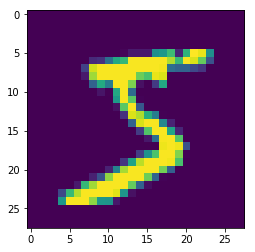

In [6]:
plt.imshow(x_train[0]) ## we can ignore the colours in the image as its shape has only one channel
plt.show()

In [8]:
## scaling the data
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

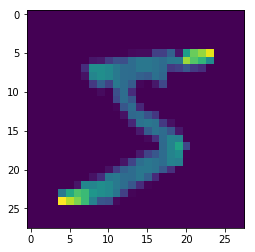

In [9]:
plt.imshow(x_train[0]) ## we can see the effects of normalization....this also helps in vanishing gradient issues and faster convergence
plt.show()

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu)) # layer 1 with 64 neurons
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu)) # layer 2 with 64 neurons
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) # softmax for multiclass classification with 10 nodes for 10 digits

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])



In [18]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0537 - acc: 0.9826
Epoch 2/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0445 - acc: 0.9859
Epoch 3/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0372 - acc: 0.9879
Epoch 4/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0302 - acc: 0.9904
Epoch 5/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0268 - acc: 0.9909
Epoch 6/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0227 - acc: 0.9926
Epoch 7/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0196 - acc: 0.9931
Epoch 8/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0182 - acc: 0.9935
Epoch 9/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0146 - acc: 0.9948
Epoch 10/10
60000/60000 [==============================] - 3s 56us/sample - loss: 

In [19]:
model.evaluate(x_test,y_test) ## accuracy as gone down a bit which is to be expected

10000/10000 [==============================] - 0s 26us/sample - loss: 0.1298 - acc: 0.9725


[0.12982400528603685, 0.9725]

In [20]:
predictions = model.predict([x_test]) ## predicting on test set

In [21]:
import numpy as np
np.argmax(predictions[0]) # it say the first number is seven

7

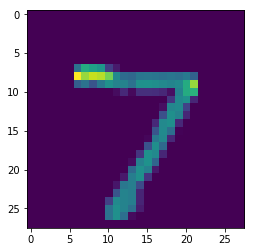

In [22]:
plt.imshow(x_test[0]) ## its definetly is a seven
plt.show()